# MNIST - Categorical Classification
> # Overfitting
## Import Tensorflow & Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* TensorFlow Version 지정

In [2]:
# %tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'2.5.0'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


* Train_Data Information

In [5]:
print(len(train_images))
print(train_images.shape)

print(len(train_labels))
print(train_labels[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


* Test_Data Information

In [6]:
print(len(test_images))
print(test_images.shape)

print(len(test_labels))
print(test_labels[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


> ## 2) Visualization

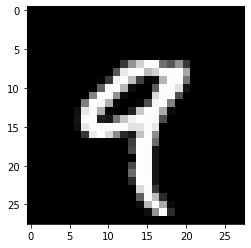

In [7]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [8]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(train_images[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

* Normalization

In [10]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

In [11]:
print(train_images[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [12]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [13]:
print(train_labels[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [14]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [15]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [16]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행(약 3분)

In [17]:
Hist_mnist = mnist.fit(train_images, train_labels,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 16s 5ms/step - loss: 0.4597 - accuracy: 0.8573 - val_loss: 0.1060 - val_accuracy: 0.9699
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 0.9691 - val_loss: 0.1274 - val_accuracy: 0.9610
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0953 - val_accuracy: 0.9750
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0940 - val_accuracy: 0.9753
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0990 - val_accuracy: 0.9758
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.1036 - val_accuracy: 0.9769
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.1199 - val_accuracy: 0.975

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

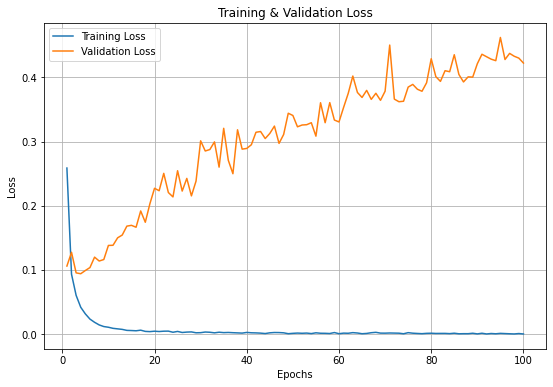

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [19]:
loss, accuracy = mnist.evaluate(test_images, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.9826
Loss = 0.38138
Accuracy = 0.98260


> ## 6) Model Predict

* Probability

In [20]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(test_images[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [21]:
print(mnist.predict_classes(test_images[:1,:]))

[7]


# 
# 
# 
# The End
# 
# 
# 